In [569]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [571]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

# librerías de para implementar modelos de ciencia de datos
from sklearn.linear_model import LinearRegression
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [665]:
# Apuntamiento a la base de datos cargado desde mi equipo
BD = pd.read_csv("C:/Users/lizzeth/Documents/UNAD/2 SEMESTRE/ANALISIS DE DATOS/archive/Car details v3.csv")

In [667]:
# Muestra la información de la base de datos
BD.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [669]:
# Para saber cuantos campos tiene nuestra base (filas - columnas)
BD.shape

(8128, 13)

In [671]:
# Muestra las ultimas filas y columnas
BD.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [673]:
# Muestra el tipo de datos
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [675]:
# Muestra los valores ausentes de la base de datos
BD.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [677]:
# con este validamos los valores duplicados
print(f'Número de valores duplicados: {BD.duplicated().sum()}')

Número de valores duplicados: 1202


In [679]:
# Eliminar valores duplicados
BD = BD.drop_duplicates().reset_index(drop=True)
print(f'Número de valores duplicados: {BD.duplicated().sum()} | Número de filas dataset: {BD.shape[0]}')

Número de valores duplicados: 0 | Número de filas dataset: 6926


In [681]:
# Calcular el porcentaje que nos genera los valores ausentes de la BD
nan_count = BD.isna().sum()
nan_percent = 100 * BD.isna().sum() / len(BD)
nan_table = pd.concat([nan_count, nan_percent], axis=1)
nan_table.columns = ['Valores Ausentes', '% Ausentes']
nan_table[nan_table.iloc[:,1] != 0]

,Valores Ausentes,% Ausentes
mileage,208,3.003176
engine,208,3.003176
max_power,205,2.959861
torque,209,3.017615
seats,208,3.003176


In [172]:
# Trabajamos los valores ausentes de mileage analizando la distribución de los datos
BD['mileage'].value_counts(dropna=False, normalize=True)

mileage
18.9 kmpl      0.030321
NaN            0.030032
19.7 kmpl      0.024256
18.6 kmpl      0.021658
21.1 kmpl      0.021080
                 ...   
12.5 kmpl      0.000144
14.5 kmpl      0.000144
16.34 kmpl     0.000144
20.88 km/kg    0.000144
16.51 kmpl     0.000144
Name: proportion, Length: 394, dtype: float64

In [174]:
# se crea tabla dinamica entre el mileage y engine para devolver la moda y poder rellenar espacios faltantes
mileage_without_nan = BD.dropna(subset=['mileage','engine'])
mileage_engine = mileage_without_nan.pivot_table(index=['name','engine'], values='mileage', aggfunc=mode)

# creamos una función para rellenar los campos ausentes con la moda y si no que aparezca la palabra ausente
def fill_mileage(row):
    engine = row['engine']
    mileage = row['mileage']
    name = row['name']

    if pd.isna(mileage):
        try:
            return mileage_engine.loc[(name, engine), 'mileage']
        except:
            return 'Error'
    return mileage

# Aplicamos la función a nuestro dataset
BD['mileage'] = BD.apply(fill_mileage, axis = 1)

# Comprobamos si existen valores que no se rellenaron
Errors = BD[BD['mileage'] == 'Error']
print(f'Error al aplicar la función fill_name: {len(Errors)}')




Error al aplicar la función fill_name: 208


In [176]:
# Reemplazamos los errores por la moda de la columna
BD['mileage'] = BD['mileage'].replace('Error', mode(BD['mileage']))

# Comprobamos los cambios realizados 
print('Número de errores en model:', len(BD[BD['engine'] == 'Error']))
print('Valores únicos en mileage:')
print(BD['mileage'].value_counts(dropna=False, normalize=True))

Número de errores en model: 0
Valores únicos en mileage:
mileage
18.9 kmpl      0.060352
19.7 kmpl      0.024256
18.6 kmpl      0.021658
21.1 kmpl      0.021080
17.0 kmpl      0.017904
                 ...   
12.5 kmpl      0.000144
14.5 kmpl      0.000144
16.34 kmpl     0.000144
20.88 km/kg    0.000144
16.51 kmpl     0.000144
Name: proportion, Length: 393, dtype: float64


In [579]:
# Trabajamos los valores ausentes de engine analizando la distribución de los datos
BD['engine'].value_counts(dropna=False, normalize=True)

engine
1248 CC    0.125123
1197 CC    0.102362
998 CC     0.055733
796 CC     0.054626
2179 CC    0.047859
             ...   
2835 CC    0.000123
1489 CC    0.000123
1422 CC    0.000123
2496 CC    0.000123
1950 CC    0.000123
Name: proportion, Length: 122, dtype: float64

In [180]:
# se crea tabla dinamica entre el engine y mileage para devolver la moda y poder rellenar espacios faltantes
engine_without_nan = BD.dropna(subset=['engine','mileage'])
engine_mileage = engine_without_nan.pivot_table(index=['name','mileage'], values='engine', aggfunc=mode)

# creamos una función para rellenar los campos ausentes con la moda y si no que aparezca la palabra ausente
def fill_engine(row):
    mileage = row['mileage']
    engine = row['engine']
    name = row['name']

    if pd.isna(engine):
        try:
            return engine_mileage.loc[(name, mileage), 'engine']
        except:
            return 'Error'
    return engine

# Aplicamos la función a nuestro dataset
BD['engine'] = BD.apply(fill_engine, axis = 1)

# Comprobamos si existen valores que no se rellenaron
Errors = BD[BD['engine'] == 'Error']
print(f'Error al aplicar la función fill_name: {len(Errors)}')


Error al aplicar la función fill_name: 208


In [184]:
# Reemplazamos los errores por la moda de la columna
BD['engine'] = BD['engine'].replace('Error', mode(BD['engine']))

# Comprobamos los cambios realizados 
print('Número de errores en model:', len(BD[BD['mileage'] == 'Error']))
print('Valores únicos en engine:')
print(BD['engine'].value_counts(dropna=False, normalize=True))

Número de errores en model: 0
Valores únicos en engine:
engine
1248 CC    0.160988
1197 CC    0.100780
796 CC     0.060785
998 CC     0.057465
2179 CC    0.048946
             ...   
1489 CC    0.000144
1422 CC    0.000144
2496 CC    0.000144
3604 CC    0.000144
1950 CC    0.000144
Name: proportion, Length: 121, dtype: float64


In [186]:
# Trabajamos los valores ausentes de max_power analizando la distribución de los datos
BD['max_power'].value_counts(dropna=False, normalize=True)


max_power
74 bhp        0.046780
NaN           0.029599
88.5 bhp      0.025556
46.3 bhp      0.022813
67 bhp        0.021946
                ...   
186 bhp       0.000144
157.75 bhp    0.000144
265 bhp       0.000144
55.23 bhp     0.000144
135.1 bhp     0.000144
Name: proportion, Length: 323, dtype: float64

In [188]:
# se crea tabla dinamica entre el max_power y engine para devolver la moda y poder rellenar espacios faltantes
max_power_without_nan = BD.dropna(subset=['max_power','engine'])
max_power_engine = max_power_without_nan.pivot_table(index=['name','engine'], values='max_power', aggfunc=mode)

# creamos una función para rellenar los campos ausentes con la moda y si no que aparezca la palabra ausente
def fill_maxpower(row):
    engine = row['engine']
    max_power = row['max_power']
    name = row['name']

    if pd.isna(max_power):
        try:
            return max_power_engine.loc[(name, engine), 'max_power']
        except:
            return 'Error'
    return max_power

# Aplicamos la función a nuestro dataset
BD['max_power'] = BD.apply(fill_maxpower, axis = 1)

# Comprobamos si existen valores que no se rellenaron
Errors = BD[BD['max_power'] == 'Error']
print(f'Error al aplicar la función fill_name: {len(Errors)}')


Error al aplicar la función fill_name: 183


In [190]:
# Reemplazamos los errores por la moda de la columna
BD['max_power'] = BD['max_power'].replace('Error', mode(BD['max_power']))

# Comprobamos los cambios realizados 
print('Número de errores en model:', len(BD[BD['engine'] == 'Error']))
print('Valores únicos en max_power:')
print(BD['max_power'].value_counts(dropna=False, normalize=True))

Número de errores en model: 0
Valores únicos en max_power:
max_power
74 bhp        0.076379
88.5 bhp      0.025556
46.3 bhp      0.022813
67 bhp        0.021946
67.1 bhp      0.020358
                ...   
265 bhp       0.000144
55.23 bhp     0.000144
156 bhp       0.000144
181.04 bhp    0.000144
135.1 bhp     0.000144
Name: proportion, Length: 322, dtype: float64


In [581]:
# se crea tabla dinamica entre el torque y engine para devolver la moda y poder rellenar espacios faltantes
torque_without_nan = BD.dropna(subset=['torque','engine'])
torque_engine = torque_without_nan.pivot_table(index=['name','engine'], values='torque', aggfunc=mode)

# creamos una función para rellenar los campos ausentes con la moda y si no que aparezca la palabra ausente
def fill_torque(row):
    engine = row['engine']
    torque = row['torque']
    name = row['name']

    if pd.isna(torque):
        try:
            return torque_engine.loc[(name, engine), 'torque']
        except:
            return 'Error'
    return torque

# Aplicamos la función a nuestro dataset
BD['torque'] = BD.apply(fill_torque, axis = 1)

# Comprobamos si existen valores que no se rellenaron
Errors = BD[BD['torque'] == 'Error']
print(f'Error al aplicar la función fill_name: {len(Errors)}')


Error al aplicar la función fill_name: 222


In [194]:
# Reemplazamos los errores por la moda de la columna
BD['torque'] = BD['torque'].replace('Error', mode(BD['torque']))

# Comprobamos los cambios realizados 
print('Número de errores en model:', len(BD[BD['torque'] == 'Error']))
print('Valores únicos en torque:')
print(BD['torque'].value_counts(dropna=False, normalize=True))

Número de errores en model: 0
Valores únicos en torque:
torque
190Nm@ 2000rpm           0.098181
200Nm@ 1750rpm           0.057465
90Nm@ 3500rpm            0.050967
62Nm@ 3000rpm            0.023101
114Nm@ 4000rpm           0.022524
                           ...   
90Nm@ 2650rpm            0.000144
240Nm@ 1850rpm           0.000144
130Nm@ 3000rpm           0.000144
219.9Nm@ 1750-2750rpm    0.000144
96  Nm at 3000  rpm      0.000144
Name: proportion, Length: 441, dtype: float64


In [196]:
# Trabajamos los valores ausentes de seats analizando la distribución de los datos
BD['seats'].value_counts(dropna=False, normalize=True)

seats
5.0     0.758591
7.0     0.139474
8.0     0.032053
NaN     0.030032
4.0     0.017904
9.0     0.010684
6.0     0.008230
10.0    0.002599
2.0     0.000289
14.0    0.000144
Name: proportion, dtype: float64

In [198]:
# se crea tabla dinamica entre el seats y engine para devolver la moda y poder rellenar espacios faltantes
seats_without_nan = BD.dropna(subset=['seats','name'])
seats_engine = seats_without_nan.pivot_table(index=['name'], values='seats', aggfunc=mode)

# creamos una función para rellenar los campos ausentes con la moda y si no que aparezca la palabra ausente
def fill_seats(row):
    seats = row['seats']
    name = row['name']

    if pd.isna(seats):
        try:
            return seats_name.loc[(name), 'seats']
        except:
            return 'Error'
    return seats

# Aplicamos la función a nuestro dataset
BD['seats'] = BD.apply(fill_seats, axis = 1)

# Comprobamos si existen valores que no se rellenaron
Errors = BD[BD['seats'] == 'Error']
print(f'Error al aplicar la función fill_name: {len(Errors)}')


Error al aplicar la función fill_name: 208


In [200]:
# Reemplazamos los errores por la moda de la columna
BD['seats'] = BD['seats'].replace('Error', mode(BD['seats']))

# Comprobamos los cambios realizados 
print('Número de errores en name:', len(BD[BD['name'] == 'Error']))
print('Valores únicos en seats:')
print(BD['seats'].value_counts(dropna=False, normalize=True))

Número de errores en name: 0
Valores únicos en seats:
seats
5.0     0.788623
7.0     0.139474
8.0     0.032053
4.0     0.017904
9.0     0.010684
6.0     0.008230
10.0    0.002599
2.0     0.000289
14.0    0.000144
Name: proportion, dtype: float64


C:\Users\lizzeth\AppData\Local\Temp\ipykernel_21820\2854275362.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BD['seats'] = BD['seats'].replace('Error', mode(BD['seats']))


In [591]:
#Devuelve un diagrama de cajas con sus rangos intercuartílicos
def boxplot_function(BD, column, ylim=(0,0)):
    Q1= BD[column].quantile(0.25)
    Q3= BD[column].quantile(0.75)
    IQR = Q3 - Q1

    BD.boxplot(column)
    plt.ylim(ylim)
    plt.hlines(y=[(Q1-1.5*IQR),(Q3+1.5*IQR)], xmin=0.9, xmax=1.1, color='red')
    plt.show()

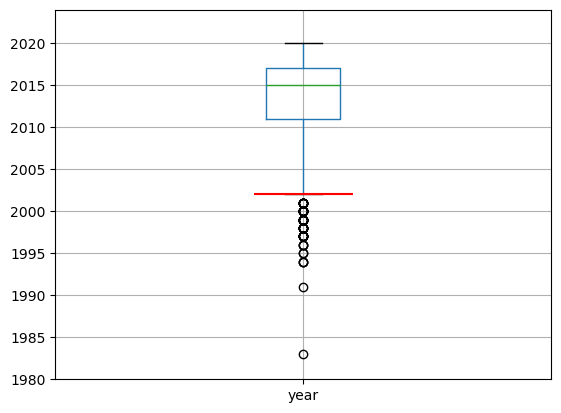

In [595]:
#validar rango de años de los vehiculos
boxplot_function(BD, 'year', (1980, 2024))

In [593]:
print(f'''Fecha más antigua de registro de la BD: {BD['year'].min()}
Fecha más reciente de registro de la BD: {BD['year'].max()}''')

Fecha más antigua de registro de la BD: 1983
Fecha más reciente de registro de la BD: 2020


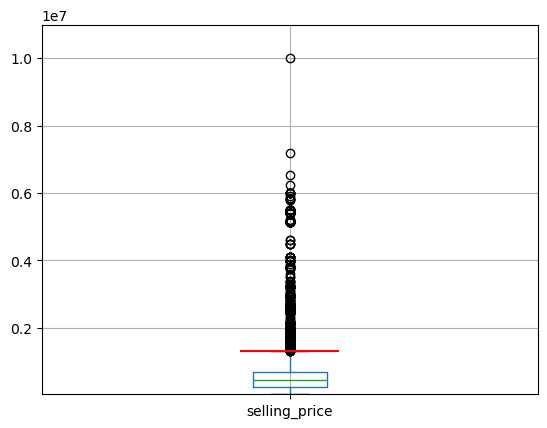

In [597]:
#validar rango de precios de los vehiculos
boxplot_function(BD, 'selling_price', (29900, 11000000))

In [599]:
print(f'''El precio mas bajo es: {BD['selling_price'].min()}
El valor mas precio es: {BD['selling_price'].max()}''')

El precio mas bajo es: 29999
El valor mas precio es: 10000000


In [601]:
# Filtramos nuestro BD por años
BD_filtered = BD.query('1983 <= year <= 2020')

# Comprobamos los cambios 
BD_filtered['year'].describe()

count    8128.000000
mean     2013.804011
std         4.044249
min      1983.000000
25%      2011.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [255]:
# Calculamos la edad de cada vehículo
BD_filtered['car_age'] = 2020 - BD_filtered['year']

# Comprobamos los valores calculados
BD_filtered['car_age'].head()

0     6
1     6
2    14
3    10
4    13
Name: car_age, dtype: int64

In [603]:
# Mostramos BD final
BD_final.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,10
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,10
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,18
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,14
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,17


In [424]:
# Codificamos las características categóricas a través de get_dummies
BD_ohe = pd.get_dummies(BD_final, drop_first=True)

# Establecemos las características numéricas
numeric_ohe = ['selling_price', 'km_driven', 'car_age']

# Escalamos los datos numéricos 
scaler = StandardScaler()
scaler.fit(BD_ohe[numeric_ohe])
BD_ohe[numeric_ohe] = scaler.transform(BD_ohe[numeric_ohe])
BD_ohe.head()

,year,selling_price,km_driven,seats,car_age,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,name_Ashok Leyland Stile LE,name_Audi A3 35 TDI Premium Plus,...,torque_96.1Nm@ 3000rpm,torque_96Nm@ 2500rpm,torque_96Nm@ 3000rpm,torque_96Nm@ 3500rpm,torque_98Nm@ 1600-3000rpm,torque_99.04Nm@ 4500rpm,torque_99.07Nm@ 4500rpm,torque_99.1Nm@ 4500rpm,torque_99.8Nm@ 2700rpm,torque_99Nm@ 4500rpm
0,2014,-0.129434,1.225357,5.0,-0.142153,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,-0.283360,0.788368,5.0,-0.142153,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,-0.691265,1.131104,5.0,1.819597,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2010,-0.562352,0.908326,5.0,0.838722,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,-0.745139,0.788368,5.0,1.574378,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [623]:
# Establecemos características y objetivo para la regresión lineal
x_ohe = BD_ohe.drop('selling_price', axis=1)
y_ohe = BD_ohe['selling_price']

# Dividimos en un conjunto de entrenamiento y prueba en proporción 75:25
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(x_ohe, y_ohe, test_size=0.25, random_state=0)

# Comprobamos que los datos se dividieron correctamente
print(f'Tamaño del conjunto de entrenamiento: {x_train_ohe.shape}, {y_train_ohe.shape}')
print(f'Tamaño del conjunto de prueba: {x_test_ohe.shape}, {y_test_ohe.shape}')

Tamaño del conjunto de entrenamiento: (5194, 3342), (5194,)
Tamaño del conjunto de prueba: (1732, 3342), (1732,)


In [625]:
print (x_ohe)

      year  km_driven  seats   car_age  \
0     2014   1.225357    5.0 -0.142153   
1     2014   0.788368    5.0 -0.142153   
2     2006   1.131104    5.0  1.819597   
3     2010   0.908326    5.0  0.838722   
4     2007   0.788368    5.0  1.574378   
...    ...        ...    ...       ...   
6921  2013  -0.411210    5.0  0.103066   
6922  2014   0.102895    5.0 -0.142153   
6923  2013   0.617000    5.0  0.103066   
6924  2007   0.771231    5.0  1.574378   
6925  2009   0.788368    5.0  1.083940   

      name_Ambassador Classic 2000 DSZ AC PS  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   
...                                      ...   
6921                                   False   
6922                                   False   
6923                                   False   
6924           

In [627]:
print (y_ohe)

0      -0.129434
1      -0.283360
2      -0.691265
3      -0.562352
4      -0.745139
          ...   
6921   -0.495009
6922   -0.081332
6923   -0.379564
6924   -0.735519
6925   -0.260271
Name: selling_price, Length: 6926, dtype: float64


In [629]:
# Entrenamos el modelo de regresión lineal
start_train = time.time()
lr_model = LinearRegression()
lr_model.fit(x_train_ohe, y_train_ohe)
end_train = time.time()

# Realizamos predicciones
start_test = time.time()
y_pred = lr_model.predict(x_test_ohe)
end_test = time.time()



In [630]:
print (y_pred)

[-0.57617188 -0.70507812 -0.41113281 ... -0.70605469 -0.76367188
 -0.77148438]


In [633]:
print (y_test_ohe)

1043   -0.600835
888    -0.764380
3768   -0.610454
311     0.034113
4670   -0.177536
          ...   
2213   -0.523870
3559   -0.321842
192    -0.581592
2459   -0.668176
6618   -0.841343
Name: selling_price, Length: 1732, dtype: float64


In [718]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluamos rl desempeño dle modelo
mse = mean_squared_error(y_test_ohe, y_pred)
r2 = r2_score(y_test_ohe, y_pred)

# Mostrar resultados de lo evaluado
print("Mean Squared Error (MSE):", mse)
print("R-squared(R²):", r2)

Mean Squared Error (MSE): 2.5033663954156093e+19
R-squared(R²): -1.923557246273883e+19


Mean Squared Error (MSE): 2.5033663954156093e+19


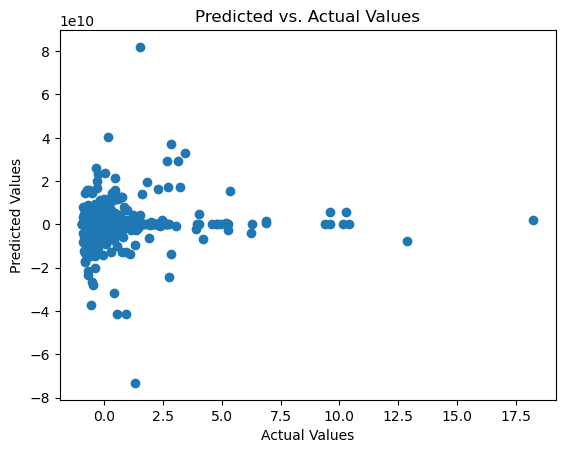

In [730]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you already have y_test_ohe and y_pred

# Calculate MSE and R²
mse = mean_squared_error(y_test_ohe, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)

plt.scatter(y_test_ohe, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

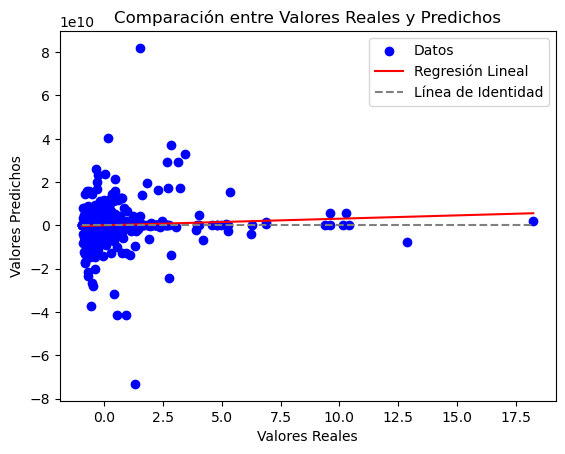

In [732]:
#Grafico de dispersión
plt.scatter(y_test_ohe, y_pred, marker='o', color='blue', label='Datos')
plt.plot(np.unique(y_test_ohe), np.poly1d(np.polyfit(y_test_ohe, y_pred, 1))(np.unique(y_test_ohe)), color='red', label='Regresión Lineal')
plt.plot([min(y_test_ohe), max(y_test_ohe)], [min(y_test_ohe), max(y_test_ohe)], color='gray', linestyle='--', label='Línea de Identidad')

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()